# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [90]:
# Your code here - load the dataset
import pandas as pd
ames = pd.read_csv('ames.csv', index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [91]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [93]:
# Your code here - drop columns with missing data
ames.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [94]:
ames_clean=ames.dropna(axis=1)
ames_clean.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 61, dtype: int64

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [95]:
# Your code here - continuous numeric predictor
cont_num = ames.select_dtypes(include='float64').columns
cont_num 

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Discrete Numeric Predictor

In [96]:
# Your code here - discrete numeric predictor
"""disc_num = ames_clean.select_dtypes(include='int64').columns
disc_num = disc_num.drop('SalePrice')
disc_num """

discrete_numeric = []
for col in ames_clean.select_dtypes(['int64']):
    if ames_clean[col].nunique() < 20:
        discrete_numeric.append(col)
discrete_numeric

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

### String Categorical Predictor

In [97]:
# Your code here - string categorical predictor
string_categorical = []
for col in ames_clean.select_dtypes(include=['object']).columns:
    if ames_clean[col].nunique() >= 10:
        string_categorical.append(col)
string_categorical

['Neighborhood', 'Exterior1st', 'Exterior2nd']

### Discrete Categorical Predictor

In [98]:
# Your code here - discrete categorical predictor
discrete_categorical = []
for col in ames_clean.select_dtypes(include=['object']).columns:
    if ames_clean[col].nunique() < 10:
        discrete_categorical.append(col)
discrete_categorical


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [99]:
matrix = ames_clean.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False)
matrix

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [100]:
# Your code here - prepare X and y, including one-hot encoding
y = ames_clean['SalePrice']
X = ames_clean[['GrLivArea', 'GarageCars', 'GarageArea', 'MSZoning']]
X = pd.get_dummies(X, columns=['MSZoning'], drop_first=True, dtype=int)
X

,GrLivArea,GarageCars,GarageArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,
1,1710,2,548,0,0,1,0
2,1262,2,460,0,0,1,0
3,1786,2,608,0,0,1,0
4,1717,3,642,0,0,1,0
5,2198,3,836,0,0,1,0
...,...,...,...,...,...,...,...
1456,1647,2,460,0,0,1,0
1457,2073,2,500,0,0,1,0
1458,2340,1,252,0,0,1,0


In [101]:
ames_clean['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [102]:
# Your answer here - which category or categories were dropped?
#In MSZoning  A, C, I, RP categories were dropped. 
#Categories with zero occurence(A,I,RP) are removed
#C was removed to handle multicollinearity 

In [103]:
# Your code here - build a regression model and display results
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     384.8
Date:                Mon, 23 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:06:19   Log-Likelihood:                -17778.
No. Observations:                1460   AIC:                         3.557e+04
Df Residuals:                    1452   BIC:                         3.561e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.186e+04   1.52e+04     -4.714      

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

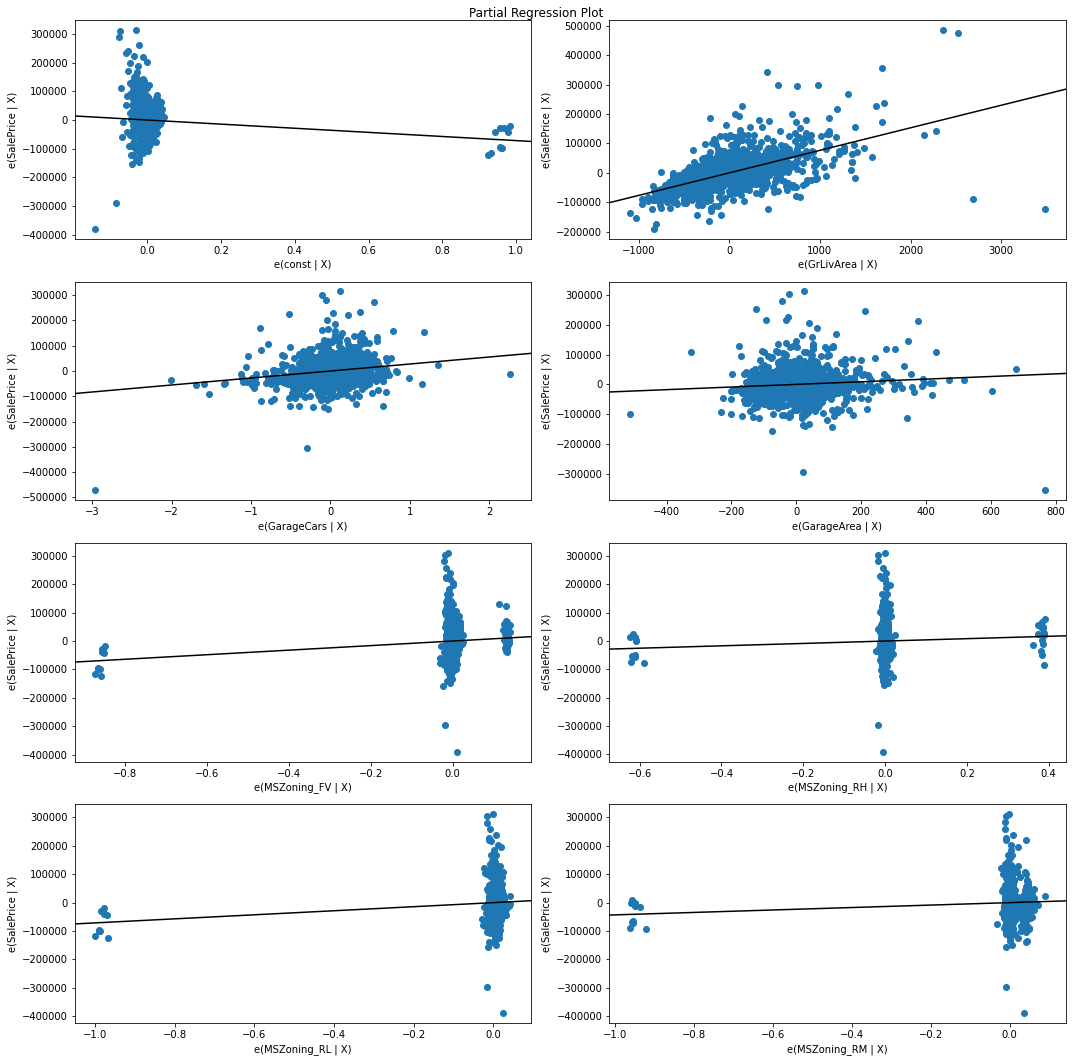

In [104]:
# Your code here - create partial regression plots
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(results, fig = fig)
plt.tight_layout()
plt.show()


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [105]:
# Your code here - calculate an error-based metric
#MAE = results.resid.abs().sum()/len(y)
RMSE = (( results.resid**2).sum()/len(y)) ** 0.5
RMSE


47001.43753679464

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [106]:
# Your answer here
#Model explains 65% of variance in prices and 
# partial regression confirms that GrLivArea remains a strong independent predictor, 
# even after controlling for other variables.

#Variables like GarageCars and GarageArea lose strength in partial regression, indicating multicollinearity.
# An RMSE of $47,001 means predictions are off by about $47k on average

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [107]:
# Your code here
from sklearn.preprocessing import OneHotEncoder
# Select as 2D
new_MSZoning = ames_clean[['MSZoning']]

# Initialize encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
X_encoded = ohe.fit_transform(new_MSZoning)

# Get proper column names
categorical_columns = ohe.get_feature_names_out(['MSZoning'])

# Create dataframe
one_hot_features = pd.DataFrame(X_encoded, 
                                columns=categorical_columns,
                                index=ames_clean.index)

# Join with numeric features
x_sklearn = pd.concat([ames_clean[['GrLivArea', 'GarageCars', 'GarageArea']], one_hot_features], axis =1)

In [108]:
model_2 = sm.OLS(y, sm.add_constant(x_sklearn))
results_2 = model_2.fit()

In [109]:
results.rsquared_adj

0.6480324017562135

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.